### SST, Chl-a, and jelly sightings timeseries

In [1]:
import requests
import os
import argparse
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import datetime as dt

In [2]:
external_folder = 'D:\\Jupyter notebooks\\Final Project data\\SST'

site_longitude = -121.9
site_latitude = 36.8

In [7]:
sst_data_files = []

In [8]:
for file_name in os.listdir(external_folder):
    if file_name[-2:] =='nc' and 'MUR' in file_name:
        sst_data_files.append(file_name)

sst_data_files.sort()

print(len(sst_data_files))

7561


In [9]:
sst_date_list = []

for file_name in sst_data_files:
    if file_name[0:2] == '20':
        year = file_name[0:4]
        month = file_name[4:6]
        day = file_name[6:8]
    else:
        year = file_name.split('_')[3][0:4]
        month = file_name.split('_')[3][4:6]
        day = file_name.split('_')[3][6:8]
        
    sst_date_string = year+'-'+month+'-'+day
    sst_date_list.append(sst_date_string)

#print(sst_date_list)

sst_date_array = np.array(sst_date_list, dtype='datetime64')

print(sst_date_array)

['2002-09-01' '2002-09-02' '2002-09-03' ... '2023-05-30' '2023-05-31'
 '2023-06-01']


In [10]:
def read_sst_from_file(file_path):

    ds = nc4.Dataset(file_path)

    mur_lat = np.array(ds.variables['lat'])
    mur_lon = np.array(ds.variables['lon'])
    mur_sst = np.array(ds.variables['analysed_sst'])

    ds.close()
    
    mur_sst = mur_sst[0,:,:]
    
    site_longitude = -121.9
    site_latitude = 36.8
    
    lat_index = np.argmin(np.abs(mur_lat-site_latitude))
    lon_index = np.argmin(np.abs(mur_lon-site_longitude))
    
    montbay_sst = mur_sst[lat_index, lon_index]
    
    return(montbay_sst)

In [11]:
sst_values = []

for file_name in sst_data_files:
    
    # define a file path
    file_path = external_folder + '\\' + file_name

    # use the sss function to find the sss value for this file
    sst = read_sst_from_file(file_path)

    # add the sss value to the list
    sst_values.append(sst)
    
print(len(sst_values))

7561


In [8]:
print(year[:5])

2023


In [12]:
print(sst_values[:5])

[288.584, 288.45099999999996, 288.138, 287.86499999999995, 287.659]


#### Average by month

In [56]:
monthly_values_degc = []
monthly_dates = []
monthly_values = []
sum = 0
count = 0
month = 9
year = 2002

for i in range(len(sst_values)):
    date = sst_date_array[i]
    value = sst_values[i]
    datetime_date = date.astype(dt.datetime)
    
    if datetime_date.month == month:
        sum += value
        count += 1
    else:
        average = sum/count
        
        monthly_values.append(average)
        date_string = str(year) + '-' + '{:02d}'.format(month) + '-' + '15'
        monthly_dates.append(date_string)
        
        sum = value
        count = 1
        
        month = datetime_date.month
        year = datetime_date.year
    
    monthly_dates_array = np.array(monthly_dates, dtype='datetime64')
    monthly_values_array = np.array(monthly_values)
    monthly_values_degc = []
    monthly_values_degc.append((monthly_values_array - 273.15))
    monthly_values_degc = np.array(monthly_values_degc)

In [58]:
monthly_values_degc = monthly_values_degc.ravel()

In [60]:
print(len(monthly_values))
print(len(monthly_values_degc))

249
249


In [59]:
print(np.shape(monthly_dates_array))
print(np.shape(monthly_values_degc))

(249,)
(249,)


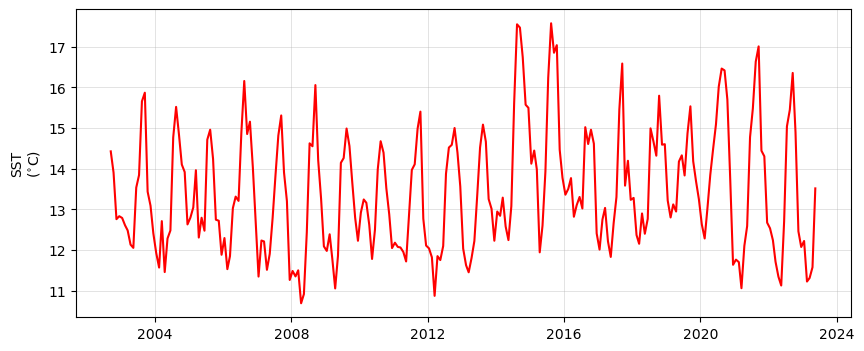

In [62]:
fig = plt.figure(figsize = (10, 4))

#plt.plot(sst_date_array, sst_values, color='red')
plt.plot(monthly_dates_array, monthly_values_degc, color='red')

plt.ylabel('SST\n($^{\circ}$C)')

plt.grid(linewidth=0.5, alpha=0.5)

In [22]:
# scatterplot of temp and chlor-a?
# add chlor-a and jelly data to same plot
# other figure for final project should be correlation between sst, chl-a, and jellies
# still need Mike to post download code for MODIS data for chl-a

In [3]:
data_folder = 'D:\\Jupyter notebooks\\Final Project data\\Chlor-a'

In [4]:
chlor_data_files = []

In [5]:
for file_name in os.listdir(data_folder):
    if file_name[:4] =='AQUA':
        chlor_data_files.append(file_name)

chlor_data_files.sort()

print(len(chlor_data_files))

7564


In [6]:
# AQUA_MODIS.20020901.L3m.DAY.CHL.chlor_a.4km

chlor_date_list = []

for file_name in chlor_data_files:
    if file_name[11:13] == '20':
        year = file_name[11:15]
        month = file_name[15:17]
        day = file_name[17:19]
        
    chlor_date_string = year+'-'+month+'-'+day
    chlor_date_list.append(chlor_date_string)

#print(sst_date_list)

chlor_date_array = np.array(chlor_date_list, dtype='datetime64')

print(chlor_date_array)

['2002-09-01' '2002-09-02' '2002-09-03' ... '2023-05-30' '2023-05-31'
 '2023-06-01']


In [7]:
print(np.shape(chlor_data_files))

(7564,)


In [8]:
def read_chl_from_file(file_path):

    ds = nc4.Dataset(file_path)

    modis_lat = np.array(ds.variables['lat'])
    modis_lon = np.array(ds.variables['lon'])
    modis_chl = np.array(ds.variables['chlor_a'])

    ds.close()
    
    site_lon = -121.9
    site_lat = 36.8
    
    lat_index_chl = np.argmin(np.abs(modis_lat-site_lat))
    lon_index_chl = np.argmin(np.abs(modis_lon-site_lon))
    
    montbay_chl = modis_chl[lat_index_chl, lon_index_chl]
    
    return(montbay_chl)

In [9]:
chlor_folder = 'D:\\Jupyter notebooks\\Final Project data\\Chlor-a'

In [10]:
chl_values = []

for file_name in chlor_data_files:
    
    # define a file path
    file_path = chlor_folder + '\\' + file_name

    # use the sss function to find the sss value for this file
    chlor = read_chl_from_file(file_path)

    # add the sss value to the list
    chl_values.append(chlor)
    
print(len(chl_values))

RuntimeError: NetCDF: HDF error

In [ ]:
fig = plt.figure(figsize = (10, 4))

#plt.plot(sst_date_array, sst_values, color='red')
plt.plot(monthly_dates_array, monthly_values_degc, color='red', label='SST\n($^{\circ}$C)')
plt.plot(monthly_dates_array, chl_values, color='green', label='Chl-a Concentration\n($mg/cm^3$)')

plt.legend()

plt.grid(linewidth=0.5, alpha=0.5)

plt.show()

In [9]:
import re

In [14]:
jelly_folder = 'D:\\Jupyter notebooks\\Final Project data\\Jellies'

with open(jelly_folder+'\\'+"Jellywatch_sightings.tsv", 'r') as myfile:  
    with open("Jellywatch_sightings.csv", 'w') as csv_file:
        for line in myfile:
       
      # Replace every tab with comma
            fileContent = re.sub("\t", ",", line)
       
      # Writing into csv file
            csv_file.write(fileContent)

# output
print("Successfully made csv file")

Successfully made csv file
